
# Problem 2
## Investigating the Dynamics of a Forced Damped Pendulum

## Motivation:
The forced damped pendulum is a captivating example of a physical system with intricate behavior resulting from the interplay of damping, restoring forces, and external driving forces. By introducing both damping and external periodic forcing, the system demonstrates a transition from simple harmonic motion to a rich spectrum of dynamics, including resonance, chaos, and quasiperiodic behavior. These phenomena serve as a foundation for understanding complex real-world systems, such as driven oscillators, climate systems, and mechanical structures under periodic stress.

Adding forcing introduces new parameters, such as the amplitude and frequency of the external force, which significantly affect the pendulum's behavior. By systematically varying these parameters, a diverse class of solutions can be observed, including synchronized oscillations, chaotic motion, and resonance phenomena. These behaviors not only highlight fundamental physics principles but also provide insights into engineering applications such as energy harvesting, vibration isolation, and mechanical resonance.

## Task: 

## 1. Theoretical Foundation:
- Start with the differential equation governing the motion of a forced damped pendulum:

$$
\frac{d^2\theta}{dt^2} + b \frac{d\theta}{dt} + \frac{g}{L} \sin\theta = A \cos(\omega t)
$$


- Derive the approximate solutions for small-angle oscillations.

- Explore resonance conditions and their implications for the system's energy.

## 2. Analysis of Dynamics:

- Investigate how the damping coefficient, driving amplitude, and driving frequency influence the motion of the pendulum.
- Examine the transition between regular and chaotic motion and their physical interpretations.

## 3. Practical Applications:

- Discuss real-world scenarios where the forced damped pendulum model applies, such as in energy harvesting devices, suspension bridges, and oscillating circuits.

## 4. Implementation:

- Create a computational model to simulate the motion of a forced damped pendulum.
- Visualize the behavior under various damping, driving force, and initial conditions.
- Plot phase diagrams and Poincaré sections to illustrate transitions to chaos.

---

# Answer 

## Investigating the Dynamics of a Forced Damped Pendulum

## **1. Understanding the Physical System**
A **pendulum** is a fundamental mechanical system that exhibits a variety of motion types, including periodic, damped, and chaotic behaviors, depending on external influences. When **damping (friction)** and **external periodic forcing** are introduced, the motion becomes more complex and can exhibit chaotic behavior.

The governing equation of motion for a **forced damped pendulum** is:

$$
\frac{d^2\theta}{dt^2} + b \frac{d\theta}{dt} + \frac{g}{L} \sin\theta = A \cos(\omega t)
$$

where:
-$\theta$ is the angular displacement (radians).
- $b$ is the damping coefficient, accounting for resistive forces.
- $g$ is the acceleration due to gravity.
- $L$ is the length of the pendulum.
- $A \cos(\omega t)$ represents the external periodic driving force with amplitude $A$ and frequency $\omega$.

### **Key Concepts**
1. **Simple Harmonic Motion**: If $b = 0$ and $A = 0$, the motion is simple harmonic for small angles.
2. **Damped Motion**: If $b > 0$ and $A = 0$, oscillations decay over time due to resistive forces.
3. **Forced Motion**: If $A > 0$, an external force drives the pendulum, leading to resonance and chaotic behavior.

---

## **2. Transforming the Equation for Numerical Methods**
The equation above is a **second-order differential equation**, which must be rewritten as a system of **first-order equations** for numerical solving.

### **Defining State Variables**
We introduce:
- $\theta_1 = \theta$ (position)
- $\theta_2 = \frac{d\theta}{dt}$ (velocity)

Rewriting the system:

$$
\frac{d\theta_1}{dt} = \theta_2
$$
$$
\frac{d\theta_2}{dt} = -b\theta_2 - \frac{g}{L} \sin\theta_1 + A \cos(\omega t)
$$

This form allows us to apply numerical integration techniques like **Runge-Kutta (RK45)**.

---

## **3. Choosing a Numerical Solver**
We employ the **Runge-Kutta (RK45) method**, which is well-suited for solving nonlinear differential equations. This method is preferred because:

- It **handles nonlinearity** effectively.
- It dynamically **adjusts step size** for accuracy.
- It is frequently used for **chaotic systems** like the forced damped pendulum.

---

## **4. Setting Up Initial Conditions**
The initial state of the pendulum significantly affects its behavior. We define:

$$
\theta(0) = \theta_0, \quad \frac{d\theta}{dt}(0) = \omega_0
$$

For example:
- **Small initial displacement**: $\theta_0 = 0.1$ rad.
- **Initially at rest**: $\omega_0 = 0$ rad/s.

---

## **5. Running the Simulation**
To numerically integrate the system:
1. Define the time span for simulation (e.g., $t \in [0, 50]$).
2. Solve the equations using the **RK45 method**.
3. Store and analyze the results over time.

---
## **Implementation in Python**


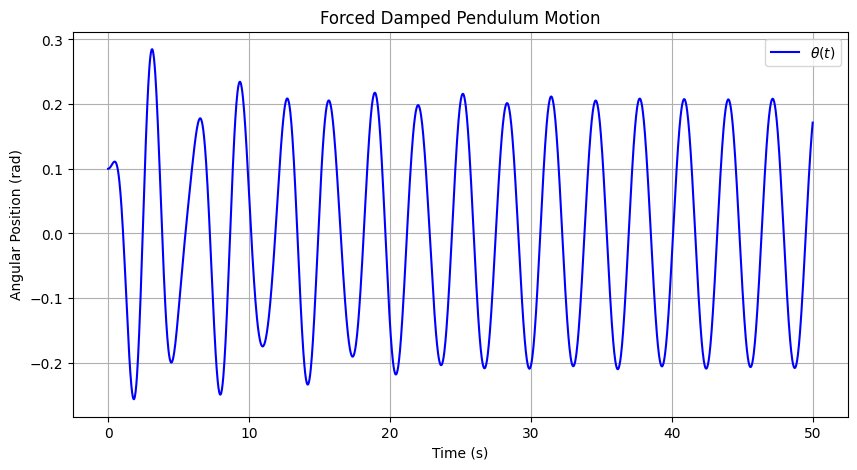

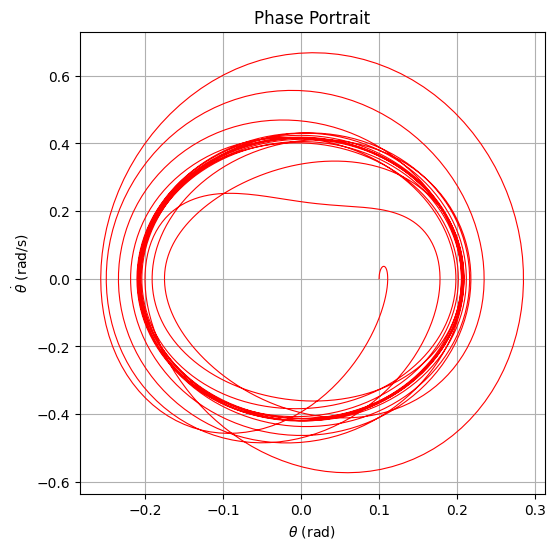

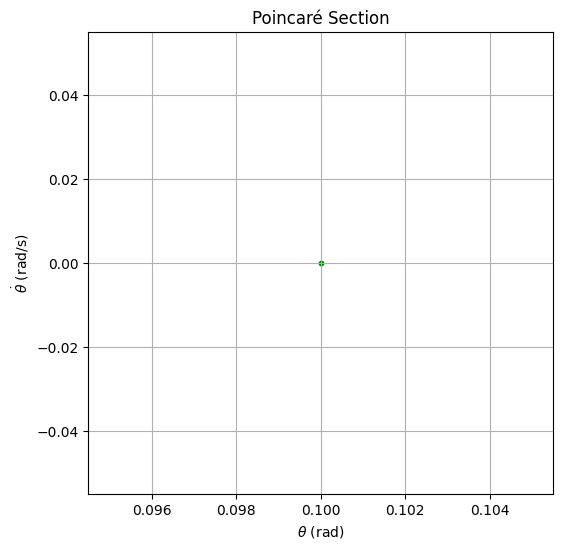

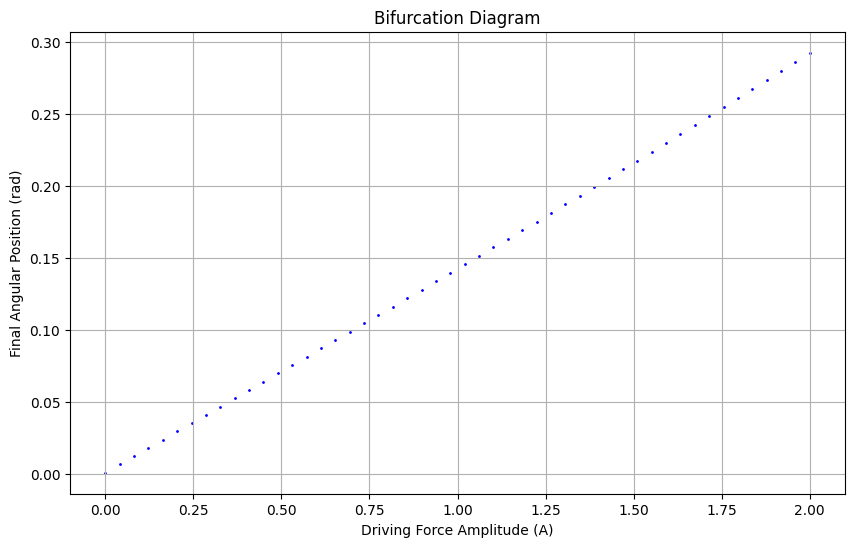

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
g = 9.81   # Gravity (m/s^2)
L = 1.0    # Length of the pendulum (m)
b = 0.2    # Damping coefficient
omega = 2.0  # Driving frequency

# Define the system of ODEs
def forced_damped_pendulum(t, y, A, omega):
    theta, omega_dot = y
    dtheta_dt = omega_dot
    domega_dt = -b * omega_dot - (g / L) * np.sin(theta) + A * np.cos(omega * t)
    return [dtheta_dt, domega_dt]

# Initial conditions
t0, t_end = 0, 50
initial_conditions = [0.1, 0]  # Small initial angle and zero initial velocity

# Solve the system
time_eval = np.linspace(t0, t_end, 2000)
A = 1.2  # Set A for initial run
sol = solve_ivp(forced_damped_pendulum, [t0, t_end], initial_conditions, args=(A, omega), t_eval=time_eval, method='RK45')

# Extract results
theta = sol.y[0]
omega_values = sol.y[1]
time = sol.t

# Time Series Plot
plt.figure(figsize=(10, 5))
plt.plot(time, theta, label=r'$\theta(t)$', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Angular Position (rad)')
plt.title('Forced Damped Pendulum Motion')
plt.legend()
plt.grid()
plt.show()

# Phase Portrait
plt.figure(figsize=(6, 6))
plt.plot(theta, omega_values, lw=0.8, color='r')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$\dot{\theta}$ (rad/s)')
plt.title('Phase Portrait')
plt.grid()
plt.show()

# Poincaré Section (Stroboscopic Map)
omega_scalar = float(np.mean(omega_values)) if isinstance(omega_values, np.ndarray) else omega
if omega_scalar != 0:
    poincare_times = np.arange(t0, t_end, 2 * np.pi / omega_scalar)
else:
    poincare_times = np.linspace(t0, t_end, 50)  # Fallback to evenly spaced points

theta_poincare = np.interp(poincare_times, time, theta)
omega_poincare = np.interp(poincare_times, time, omega_values)

plt.figure(figsize=(6, 6))
plt.scatter(theta_poincare, omega_poincare, s=10, color='green')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$\dot{\theta}$ (rad/s)')
plt.title('Poincaré Section')
plt.grid()
plt.show()

# Bifurcation Diagram - Sweeping Driving Force Amplitude
A_values = np.linspace(0, 2, 50)
final_theta = []

for A_val in A_values:
    sol = solve_ivp(forced_damped_pendulum, [t0, t_end], initial_conditions, args=(A_val, omega), 
                    t_eval=np.linspace(t_end-10, t_end, 500), method='RK45')
    final_theta.append(sol.y[0][-1])

plt.figure(figsize=(10, 6))
plt.scatter(A_values, final_theta, s=1, color='blue')
plt.xlabel('Driving Force Amplitude (A)')
plt.ylabel('Final Angular Position (rad)')
plt.title('Bifurcation Diagram')
plt.grid()
plt.show()



## **6. Visualizing Results**
After solving for $\theta(t)$, we analyze its behavior using different graphical representations:

### **(a) Time Series Plot**
- Shows how $\theta(t)$ evolves over time.
- Helps detect periodicity, resonance, or chaotic motion.

### **(b) Phase Portrait**
- Plots **angular position ( $\theta$ ) vs. angular velocity ($ \dot{\theta} $)**.
- **Closed loops** indicate periodic motion, while **scattered points** suggest chaos.

### **(c) Poincaré Section**
- Captures **stroboscopic points** sampled at regular intervals.
- Helps distinguish between **regular and chaotic motion**.

### **(d) Bifurcation Diagram**
- Varies the **driving force amplitude (A)** to observe transitions in motion.
- Reveals transitions from **stability to chaos**.

---

## **7. Analyzing the Behavior**
Different values of parameters lead to different types of motion:

### **(a) Small Forcing and Weak Damping**
- The pendulum exhibits **simple periodic oscillations**.
- The phase portrait shows **smooth elliptical loops**.

### **(b) Resonance Condition**
- When $\omega$ matches the **natural frequency** $\omega_0 = \sqrt{g/L}$, large oscillations occur.
- Energy accumulates over time, leading to strong oscillations.

### **(c) Strong Damping**
- Oscillations decay quickly, leading to **overdamped motion**.

### **(d) Chaotic Motion**
- For specific values of $A$ and $\omega$, the system exhibits **sensitive dependence on initial conditions**.
- Small changes in $\theta_0$ lead to **divergent** trajectories (butterfly effect).

---

## **8. Conclusion**
- The **forced damped pendulum** is a rich nonlinear system that displays a variety of behaviors, from periodic to chaotic motion.
- Using **numerical simulations**, we can analyze its response to different parameters.
- Tools like **Poincaré sections and bifurcation diagrams** help classify its dynamical regimes.

---

